# Linear Regression with Boston Housing Dataset

In [1]:
from __future__ import division, print_function
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
DATA_DIR = "../../data"

## Prepare Data

In [3]:
fdata = open(os.path.join(DATA_DIR, "housing.data"), "rb")
data, prices = [], []
for line in fdata:
    cols = [float(x) for x in line.strip().split()]
    data.append(np.array(cols[:-1]))
    prices.append(cols[-1])
fdata.close()

X = np.array(data)
y = np.array(prices).reshape(-1, 1)
print(X.shape, y.shape)

(506, 13) (506, 1)


In [4]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, y, train_size=0.9)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(455, 13) (455, 1) (51, 13) (51, 1)


## Define Network

In [6]:
X = tf.placeholder(tf.float32, [None, 13], name="X")
y = tf.placeholder(tf.float32, [None, 1], name="y")

In [7]:
W = tf.Variable(tf.random_normal([13, 1]), name="W")
b = tf.Variable(tf.random_normal([1, 1]), name="b")

In [8]:
y_ = tf.add(tf.matmul(X, W), b)

In [9]:
loss = tf.reduce_mean(tf.pow(y - y_, 2))

In [10]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

## Train Network

In [11]:
losses, preds = [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_loss, epsilon, num_steps = None, None, 0
    while True:
        if num_steps % 1000 == 0 and num_steps > 0:
            print("# steps: {:d}, loss: {:.3f}, epsilon: {:.5f}"
                .format(num_steps, prev_loss, epsilon))
        _, loss_val = sess.run([optimizer, loss], feed_dict={
            X: Xtrain, y: ytrain})
        losses.append(loss_val)
        if prev_loss == None:
            epsilon = loss_val
        else:
            epsilon = prev_loss - loss_val
        if epsilon < 1e-5:
            break
        prev_loss = loss_val
        num_steps += 1
    print("# steps: {:d}, loss: {:.3f}, epsilon: {:.5f}"
        .format(num_steps, prev_loss, epsilon))
    W_val, b_val = sess.run([W, b])

# steps: 1000, loss: 434.867, epsilon: 0.05377
# steps: 2000, loss: 387.008, epsilon: 0.04297
# steps: 3000, loss: 347.285, epsilon: 0.03702
# steps: 4000, loss: 312.141, epsilon: 0.03351
# steps: 5000, loss: 279.890, epsilon: 0.03110
# steps: 6000, loss: 250.017, epsilon: 0.02872
# steps: 7000, loss: 222.377, epsilon: 0.02663
# steps: 8000, loss: 196.811, epsilon: 0.02461
# steps: 9000, loss: 173.167, epsilon: 0.02275
# steps: 10000, loss: 151.370, epsilon: 0.02089
# steps: 11000, loss: 131.396, epsilon: 0.01906
# steps: 12000, loss: 113.234, epsilon: 0.01727
# steps: 13000, loss: 96.866, epsilon: 0.01548
# steps: 14000, loss: 82.273, epsilon: 0.01370
# steps: 15000, loss: 69.431, epsilon: 0.01197
# steps: 16000, loss: 58.310, epsilon: 0.01028
# steps: 17000, loss: 48.874, epsilon: 0.00861
# steps: 18000, loss: 41.075, epsilon: 0.00699
# steps: 19000, loss: 34.853, epsilon: 0.00546
# steps: 20000, loss: 30.126, epsilon: 0.00401
# steps: 21000, loss: 26.783, epsilon: 0.00270
# steps: 2

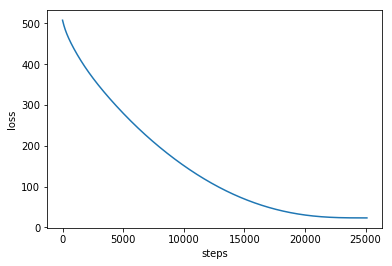

In [12]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("steps")
plt.ylabel("loss")

## Predictions

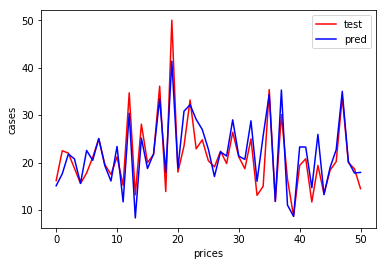

In [13]:
ytest_ = np.dot(Xtest, W_val) + b_val
plt.plot(np.arange(ytest.shape[0]), ytest, color="r", label="test")
plt.plot(np.arange(ytest_.shape[0]), ytest_, color="b", label="pred")
plt.legend(loc="best")
plt.ylabel("cases")
plt.xlabel("prices")